![Walmart Logo](https://www.theadvertisingclub.org/wp-content/uploads/2022/12/Walmart-Logo-PNG-Transparent.png-scaled.webp)

### About Walmart 🛒

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Business Problem 💡

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Dataset 📊

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

| Field Name                | Description                       |
|---------------------------|-----------------------------------|
| User_ID                   | User ID                           |
| Product_ID                | Product ID                        |
| Gender                    | Sex of User                       |
| Age                       | Age in bins                       |
| Occupation                | Occupation (Masked)               |
| City_Category             | Category of the City (A,B,C)      |
| StayInCurrentCityYears    | Number of years stay in current city |
| Marital_Status            | Marital Status                    |
| ProductCategory           | Product Category (Masked)         |
| Purchase                  | Purchase Amount                   |

#### Importing Required Libraries 🤝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="whitegrid")
palette = ["#007DC6", "#009BD7", "#00B4E5", "#00D1F2", "#FF7900", "#FFA533", "#FFC466", "#FFD699"]
bi_palette = ["#009BD7", "#FF7900"]
tri_palette = ["#007DC6", "#00D1F2", "#FF7900"]

#### Read Dataset 🔍

In [3]:
df = pd.read_csv(r'..\data\walmart_data.txt', sep=',')
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
70664,1004830,P00120242,M,0-17,10,C,0,0,8,7910
412847,1003562,P00023042,F,26-35,6,B,4+,0,5,5204
501278,1005205,P00035542,M,26-35,1,B,0,1,3,10715
468067,1000077,P00255842,M,18-25,4,C,2,0,16,16624
462219,1005156,P00322942,M,18-25,14,A,1,1,2,13044


In [4]:
print("Shape of the data: ", df.shape)
print("The Given Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Columns: ", df.columns.to_list())

Shape of the data:  (550068, 10)
The Given Dataset has 550068 rows and 10 columns
Columns:  ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']


### 🕵🏽‍♂️ Shape and Structure:

* The dataset comprises 550,068 rows and 10 columns, representing a substantial volume of transactional data. 
* Each row corresponds to a unique purchase made at Walmart during Black Friday sales.

In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### 🕵🏽‍♂️ Dataset Information:

* **Data Consistency**: All columns have the same non-null count, indicating no missing values in the dataset.
* **Data Types**: Columns are classified into integer and object types.
* **Categorical Variables**: Several columns such as Gender, Age, City_Category, and Stay_In_Current_City_Years are categorical.
* **Numerical Variables**: Columns like User_ID, Occupation, Marital_Status, Product_Category, and Purchase contain numerical data.

In [7]:
df.duplicated().sum()

0

### 🕵🏽‍♂️ Duplicate Records:

There is no duplicate record in the given dataset

In [8]:
## Converting the data types of the columns to category
for col in df.columns[:-1]:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### 🕵🏽‍♂️ Purchase Overview:
* **Count**: There are 550,068 valid entries in the 'Purchase' column, indicating the total number of purchases recorded in the dataset.
* **Mean**: The average purchase amount per transaction is approximately $9,263.97, suggesting a significant spending level among customers.
* **Standard Deviation (Std)**: The standard deviation of approximately $5,023.07 reflects the variability or dispersion of purchase amounts around the mean. A higher standard deviation indicates a wider spread of data points from the average.
* **Minimum (Min)**: The minimum purchase amount recorded is $12.0, indicating the lowest spending observed in the dataset.
* **25th Percentile (25%)**: 25% of the purchases have amounts equal to or below $5,823.0, indicating the spending behavior of a significant portion of customers.
* **Median (50%)**: The median purchase amount, at $8,047.0, represents the middle value in the dataset when arranged in ascending order. It gives a robust measure of central tendency, especially in the presence of outliers.
* **75th Percentile (75%)**: 75% of the purchases have amounts equal to or below $12,054.0, providing insight into the spending behavior of a larger proportion of customers.
* **Maximum (Max)**: The highest purchase amount recorded is $23,961.0, indicating the maximum spending observed during Black Friday sales.

#### Insight 🔭
* **Skewed Distribution**: The median purchase amount ($8,047.0) is lower than the mean, suggesting a right-skewed distribution where a few high-value purchases contribute to the higher mean.
* **Wide Range of Spending**: The range from the minimum ($12.0) to the maximum ($23,961.0) purchase amount

In [10]:
df.describe(include='category').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


#### Analysis 👨‍🔬

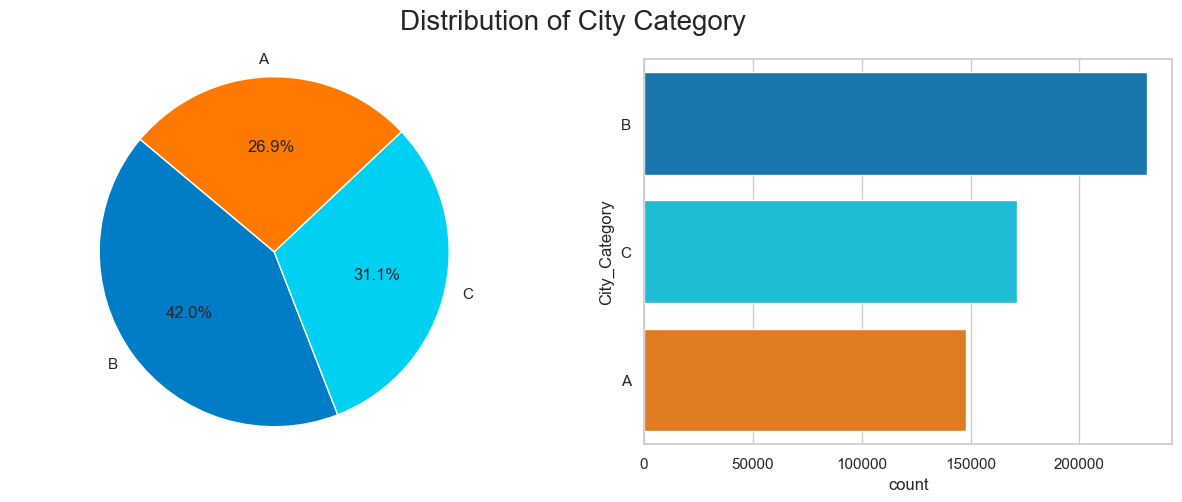

In [11]:
plt.figure(figsize=(15, 5))

plt.suptitle('Distribution of City Category', fontsize=20)

plt.subplot(1, 2, 1)
plt.pie(df['City_Category'].value_counts(), labels=df['City_Category'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=tri_palette)
plt.axis('equal')

plt.subplot(1, 2, 2)
sns.countplot(df['City_Category'], palette=tri_palette, order=df['City_Category'].value_counts().index)
plt.show()

### 🕵🏽‍♂️ City Category Overview:
* **City Category B (231,173 customers)**: Represents the largest segment of customers, indicating a significant proportion of purchases made in cities categorized as 'B'.
* **City Category C (171,175 customers)**: Constitutes the second-largest segment, suggesting substantial customer presence in cities classified as 'C'.
* **City Category A (147,720 customers)**: Represents the smallest segment, indicating a comparatively lower number of customers in cities categorized as 'A'.

In [12]:
df['Gender'] = df['Gender'].map({'M':"Male", "F":"Female"})
df['Marital_Status'] = df['Marital_Status'].map({0:"Single", 1:"Married"})

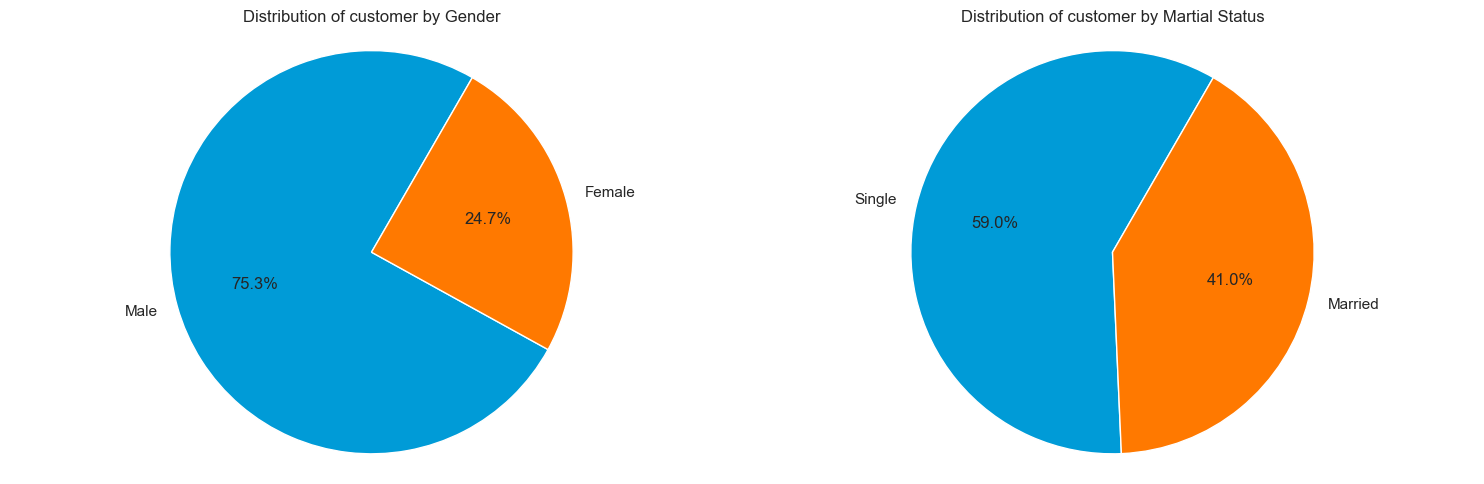

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=60, colors=bi_palette)
plt.title("Distribution of customer by Gender")
plt.axis('equal')

plt.subplot(1,2,2)
plt.pie(df['Marital_Status'].value_counts(), labels=df['Marital_Status'].value_counts().index, autopct='%1.1f%%', startangle=60, colors=bi_palette)
plt.title("Distribution of customer by Martial Status")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 🕵🏽‍♂️ Distribution of Customers by Gender and Marital Status

#### Gender
The 'Gender' column categorizes customers based on their gender. Analyzing the value counts reveals insights into the gender distribution among Walmart's Black Friday customers.

* **Male (414,259 customers)**: Represents the majority segment, indicating a higher number of male customers participating in Black Friday sales.
* **Female (135,809 customers)**: Constitutes the minority segment, with fewer female customers compared to males during Black Friday sales.

#### Martial Status
The 'Marital_Status' column categorizes customers based on their marital status. Analyzing the value counts provides insights into the marital status distribution among Walmart's Black Friday customers.

* **Single (324,731 customers)**: Represents the majority segment, indicating a higher number of single customers participating in Black Friday sales.
* **Married (225,337 customers)**: Constitutes the minority segment, with fewer married customers compared to singles during Black Friday sales.

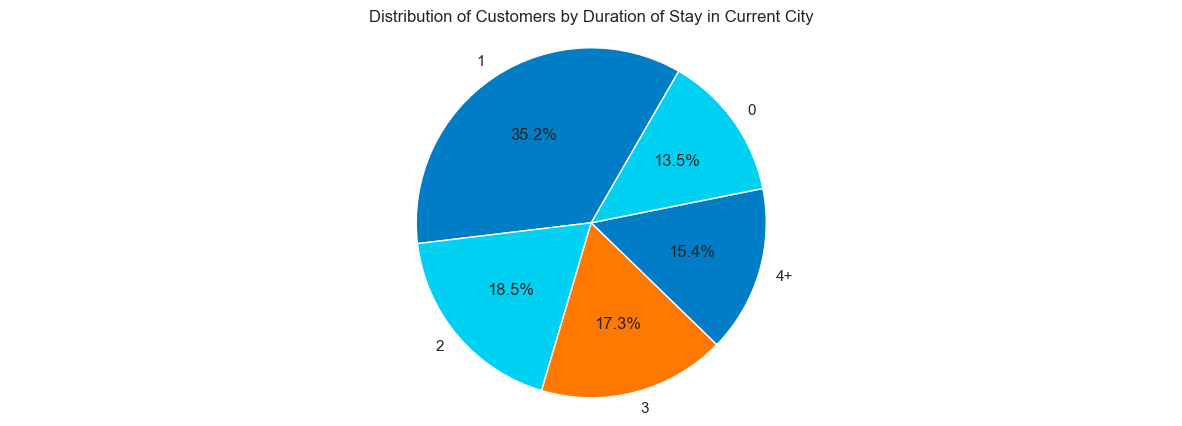

In [14]:
plt.figure(figsize=(15,5))
plt.pie(df['Stay_In_Current_City_Years'].value_counts(), labels=df['Stay_In_Current_City_Years'].value_counts().index, autopct='%1.1f%%', startangle=60, colors=tri_palette)
plt.title("Distribution of Customers by Duration of Stay in Current City")
plt.axis('equal')
plt.show()

### 🕵🏽‍♂️ Distribution of Customers by Duration of Stay in Current City

The 'Stay_In_Current_City_Years' column categorizes customers based on the duration of their stay in their current city. Analyzing the value counts reveals insights into the distribution of customers across different durations of stay during Walmart's Black Friday sales.

* **1 year (193,821 customers)**: Represents the largest segment, indicating a substantial number of customers who have been residing in their current city for one year.
* **2 years (101,838 customers)**: Constitutes a significant segment, suggesting a considerable presence of customers who have lived in their current city for two years.
* **3 years (95,285 customers)**: Represents another sizable segment, indicating a substantial number of customers with a three-year duration of stay in their current city.
* **4+ years (84,726 customers)**: Represents a notable segment, indicating customers who have resided in their current city for four years or more.
* **New Residents (0 years, 74,398 customers)**: Represents a significant segment, suggesting a considerable influx of new residents or transient customers during Black Friday sales.

In [15]:
df_1 = df['Product_Category'].value_counts().reset_index()
df_1['pctTotal'] = np.round((df_1['count']/df_1['count'].sum())*100,2)
df_1.sort_values(by='pctTotal', ascending=False)
df_1

,Product_Category,count,pctTotal
0,5,150933,27.44
1,1,140378,25.52
2,8,113925,20.71
3,11,24287,4.42
4,2,23864,4.34
5,6,20466,3.72
6,3,20213,3.67
7,4,11753,2.14
8,16,9828,1.79
9,15,6290,1.14


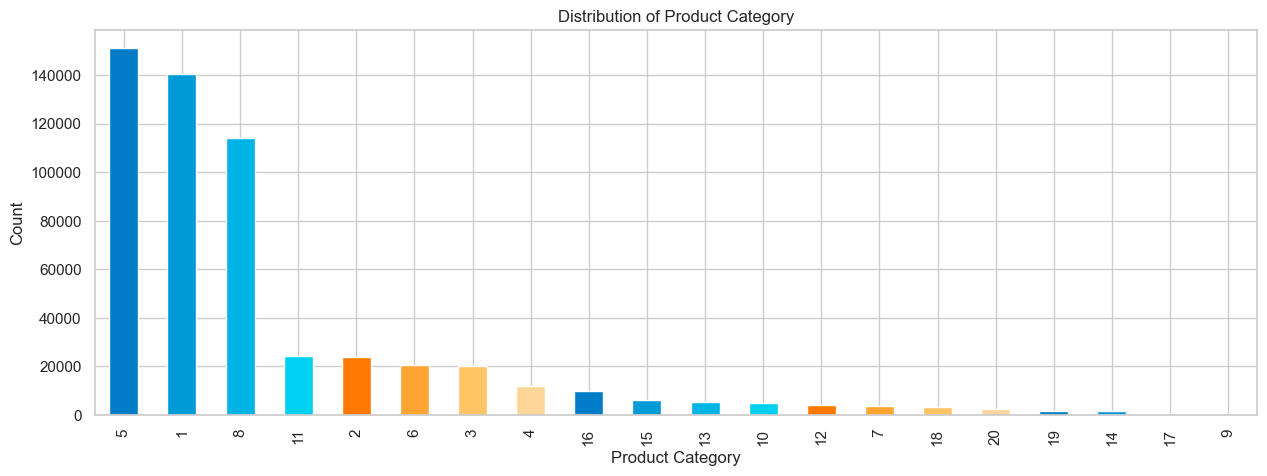

In [16]:
plt.figure(figsize=(15,5))
df['Product_Category'].value_counts().plot(kind='bar', color=palette)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.title("Distribution of Product Category")
plt.show()

### 🕵🏽‍♂️ Distribution of Product Category

The 'Product_Category' column categorizes purchase based on the product category. Analyzing the value counts reveals insights into the distribution of Purchase across different Product category during Walmart's Black Friday sales.

* **Product Category (5)**: Represents the largest segment of purchase, accounts for *27.44* percentage of the purchase made during the Black Friday sales.
* **Product Category (1)**: Constitutes a significant segment of purcahse, accounts for *25.52* percentage of the purchase made during the Black Friday sales.
* **Product Category (8)**: Constitutes a significant segment of purcahse, accounts for *20.71* percentage of the purchase made during the Black Friday sales.

#### Insight 🔭

* **Product Category (5, 1, 8)**: Contributes to the more than 70% percentage of the purchase made during the Black Friday sales.
* **Product Category (10, 12, 7, 18, 20, 19, 14, 17, 9)**: Each contributes to the less than 1% percentage of the purchase made during the Black Friday sales.

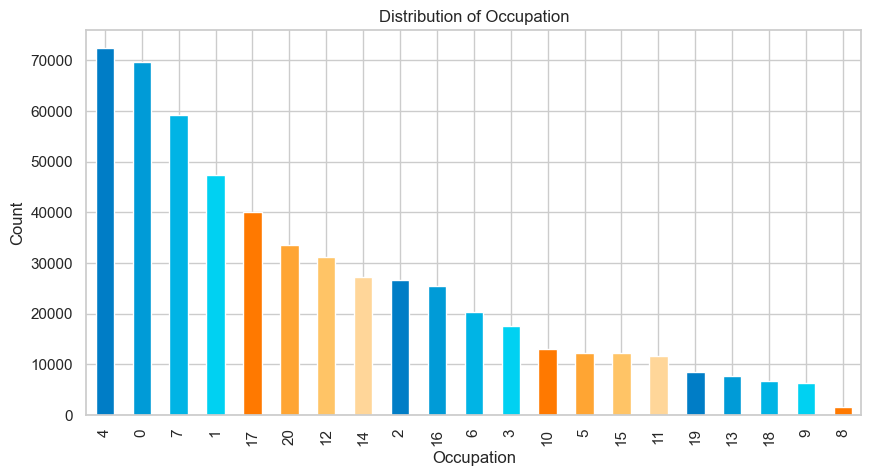

In [17]:
plt.figure(figsize=(10,5))
df['Occupation'].value_counts().plot(kind='bar', color=palette)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Distribution of Occupation")
plt.show()

In [18]:
df.groupby('Age')['Gender'].value_counts().reset_index()

,Age,Gender,count
0,0-17,Male,10019
1,0-17,Female,5083
2,18-25,Male,75032
3,18-25,Female,24628
4,26-35,Male,168835
5,26-35,Female,50752
6,36-45,Male,82843
7,36-45,Female,27170
8,46-50,Male,32502
9,46-50,Female,13199


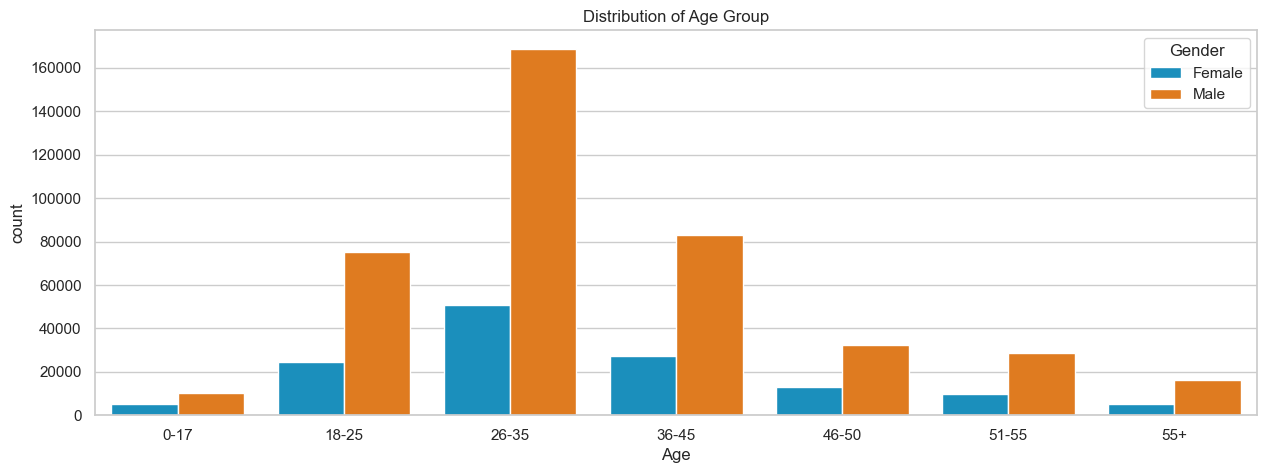

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Age', hue='Gender', palette=bi_palette)
plt.title("Distribution of Age Group")
plt.show()

### 🕵🏽‍♂️ Distribution of Age Group

* The largest age group of customers falls within the range of 26-35 years old, with a significantly **higher number of male customers compared to female customers**. This suggests that individuals in their late twenties to early thirties are the primary demographic for Walmart purchases.
* In general, there are **more male customers across all age groups**, indicating a higher male representation in the dataset.
The age group of 0-17 has a substantial number of male customers, which could indicate purchases made by parents or guardians on behalf of minors.
* The data also reveals a **decrease in the number of customers as age increases**, with the lowest counts observed in the age groups of 46-50, 51-55, and 55+. This trend is expected as older individuals may have fewer shopping needs or may shop less frequently.

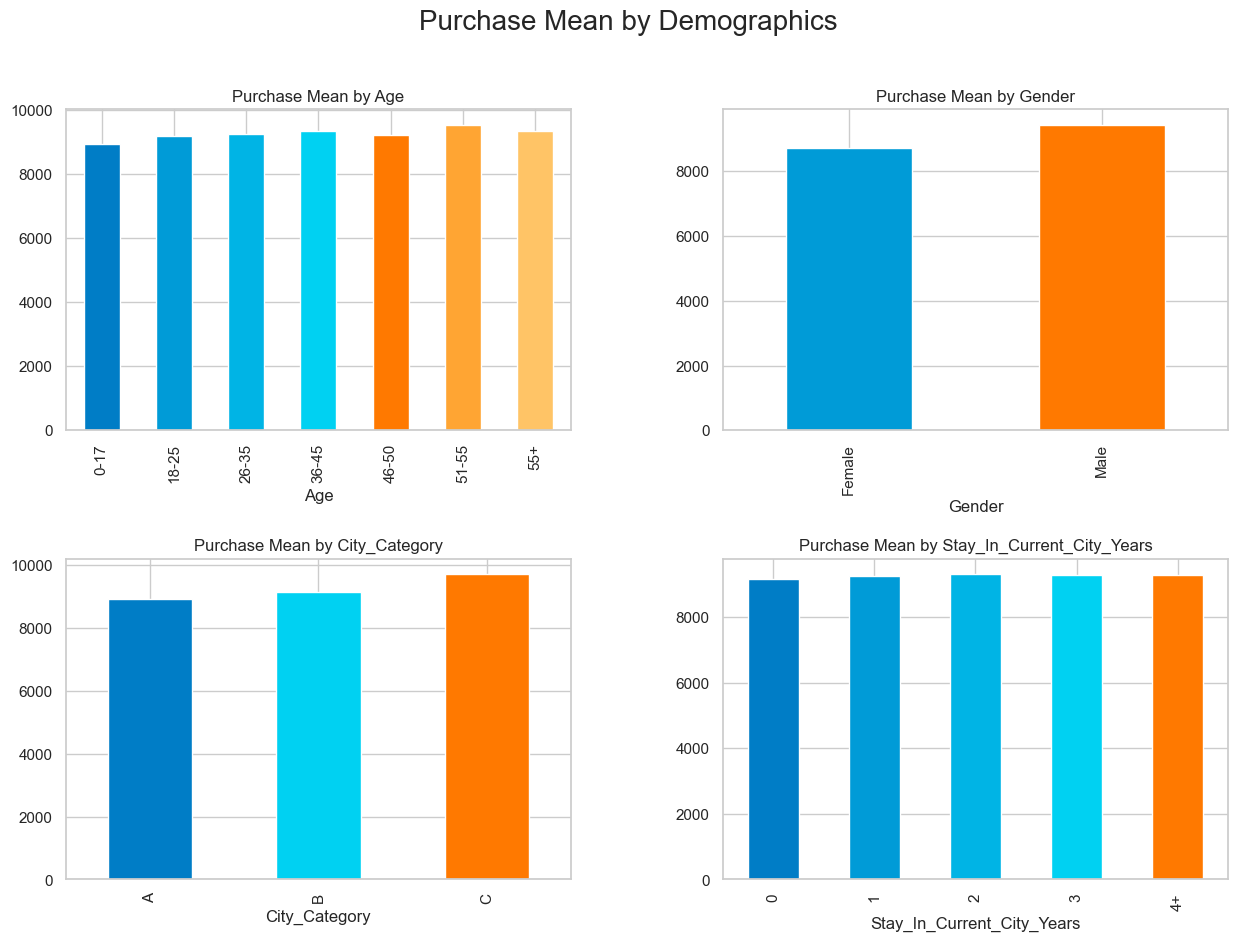

In [20]:
plt.figure(figsize=(15, 10))

# Create subplots using grid layout
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.4)
plt.suptitle('Purchase Mean by Demographics', fontsize=20)

# Plot for Purchase Mean by Age
ax1 = plt.subplot(grid[0, 0])
df.groupby('Age')['Purchase'].mean().plot(kind='bar', ax=ax1, color=palette)
plt.title('Purchase Mean by Age', fontsize=12)  # Adjust font size

# Plot for Purchase Mean by Gender
ax2 = plt.subplot(grid[0, 1])
df.groupby('Gender')['Purchase'].mean().plot(kind='bar', ax=ax2, color=bi_palette)
plt.title('Purchase Mean by Gender', fontsize=12)

# Plot for Purchase Mean by City_Category
ax3 = plt.subplot(grid[1, 0])
df.groupby('City_Category')['Purchase'].mean().plot(kind='bar', ax=ax3, color=tri_palette)
plt.title('Purchase Mean by City_Category', fontsize=12)

# Plot for Purchase Mean by Stay_In_Current_City_Years
ax4 = plt.subplot(grid[1, 1])
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar', ax=ax4, color=palette)
plt.title('Purchase Mean by Stay_In_Current_City_Years', fontsize=12)

plt.tight_layout()
plt.show()

### Gender Wise Analysis 🤼

<Figure size 1300x500 with 0 Axes>

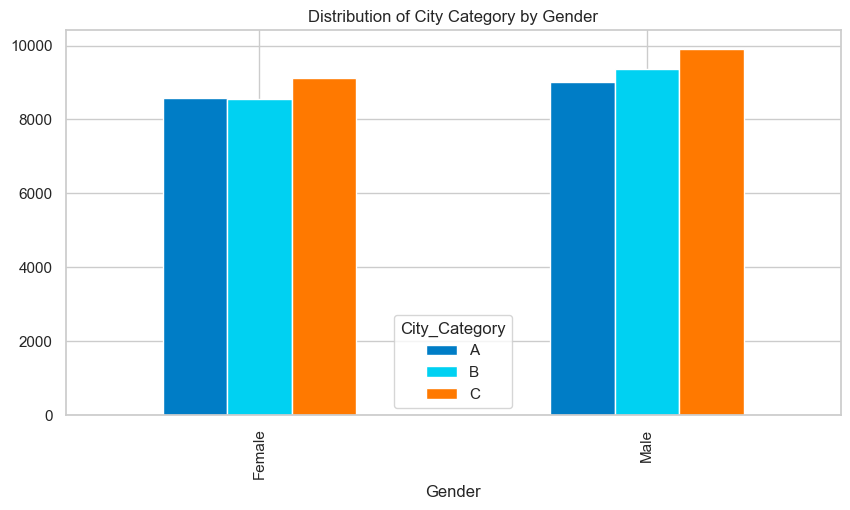

In [21]:
plt.figure(figsize=(13, 5))

df.groupby(['Gender','City_Category'])['Purchase'].mean().unstack().plot(kind='bar', figsize=(10,5), color=tri_palette)
plt.title("Distribution of City Category by Gender")
plt.show()

In [22]:
df.groupby('Gender')['Purchase'].count()

Gender
Female    135809
Male      414259
Name: Purchase, dtype: int64

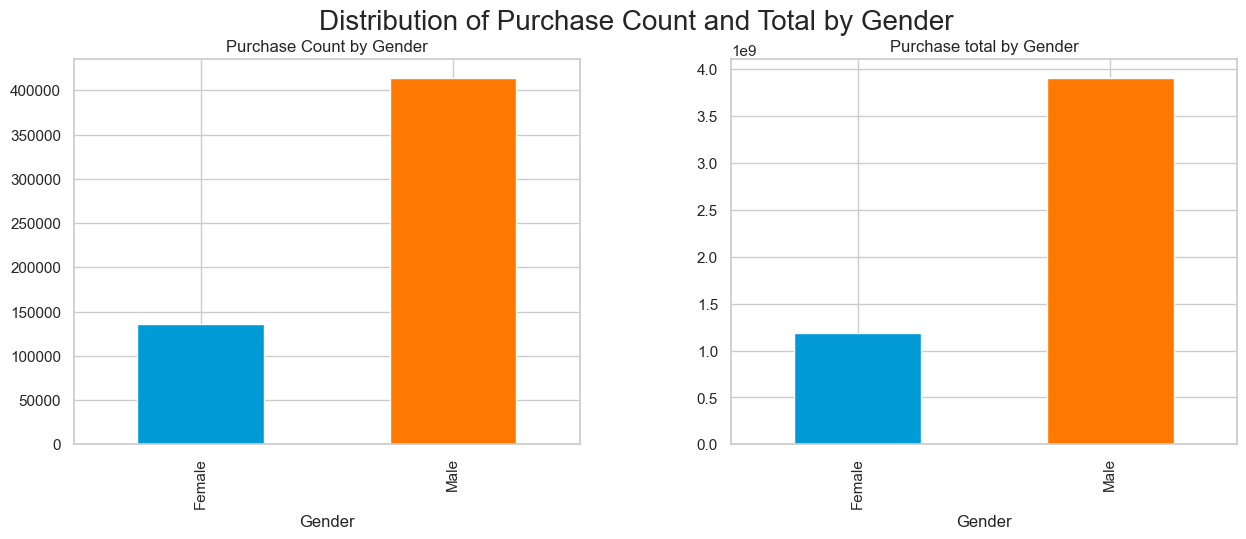

In [23]:
plt.figure(figsize=(15, 5))

# subplots using grid layout
grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.4)
plt.suptitle('Distribution of Purchase Count and Total by Gender', fontsize=20)

# Plot for Purchase Mean by Age
ax1 = plt.subplot(grid[0, 0])
df.groupby('Gender')['Purchase'].count().plot(kind='bar', ax=ax1, color=bi_palette)
plt.title('Purchase Count by Gender', fontsize=12)  # Adjust font size

# Plot for Purchase Mean by Gender
ax2 = plt.subplot(grid[0, 1])
df.groupby('Gender')['Purchase'].sum().plot(kind='bar', ax=ax2, color=bi_palette)
plt.title('Purchase total by Gender', fontsize=12)
plt.show()

### 🕵🏽‍♂️ Distribution of Purchase Count by Gender

**🔭 Male Dominance in Purchasing**: The data indicates a substantial difference in purchase count between male and female customers. Male customers account for a significantly higher number of purchases, with a count of 414,259 compared to 135,809 for female customers. This suggests that males contribute more to the overall sales volume than females.

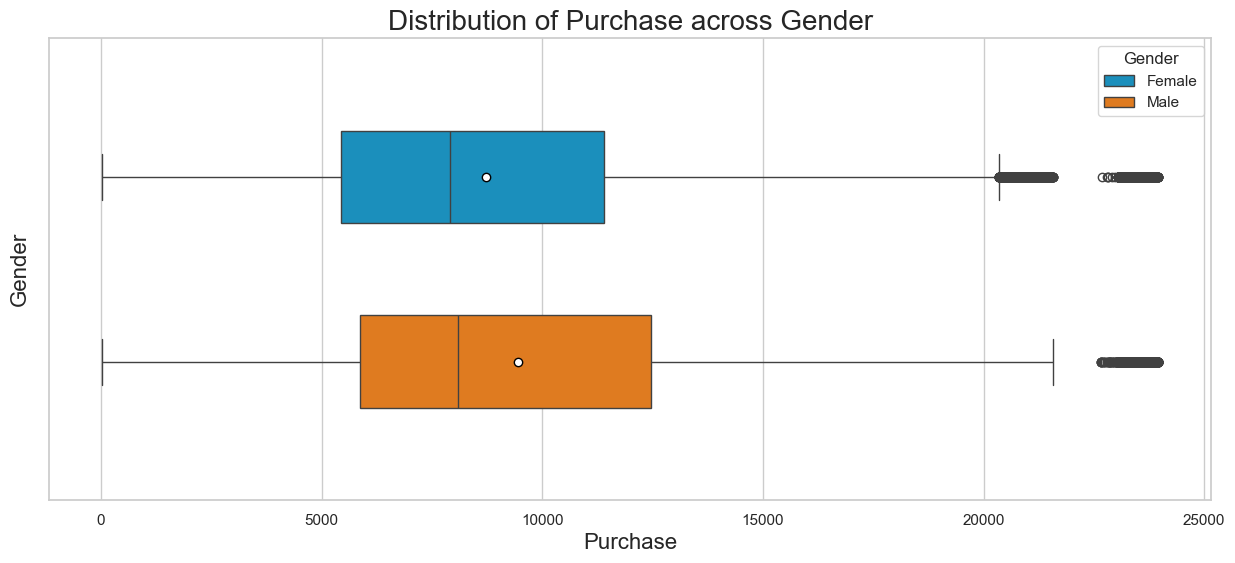

In [24]:
plt.figure(figsize=(15, 6))

# Create the boxplot
sns.boxplot(data=df, x='Purchase', orient='h', hue='Gender', palette=bi_palette, gap=0.5, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

# Add title and labels
plt.title('Distribution of Purchase across Gender', fontsize=20)
plt.xlabel('Purchase', fontsize=16)
plt.ylabel('Gender', fontsize=16)

# Show the plot
plt.show()

In [25]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
Male,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


### 🕵🏽‍♂️ Distribution of Purchase Amounts:

* **Quartiles**: Both male and female customers display similar distribution patterns, with the median (50th percentile) purchase amount falling around $7,914 for females and $8,098 for males.
* **Interquartile Range (IQR)**: The IQR, which represents the range between the 25th and 75th percentiles, indicates that the middle 50% of purchase amounts for both genders fall between approximately $5,433 and $11,400 for females and between $5,863 and $12,454 for males.
* **Range**: The minimum purchase amount recorded for both genders is $12, while the maximum purchase amount reaches $23,959 for females and $23,961 for males.

#### 🔭 Insight
While male customers make a larger number of purchases, female customers exhibit slightly lower average purchase amounts but with a similar distribution pattern.

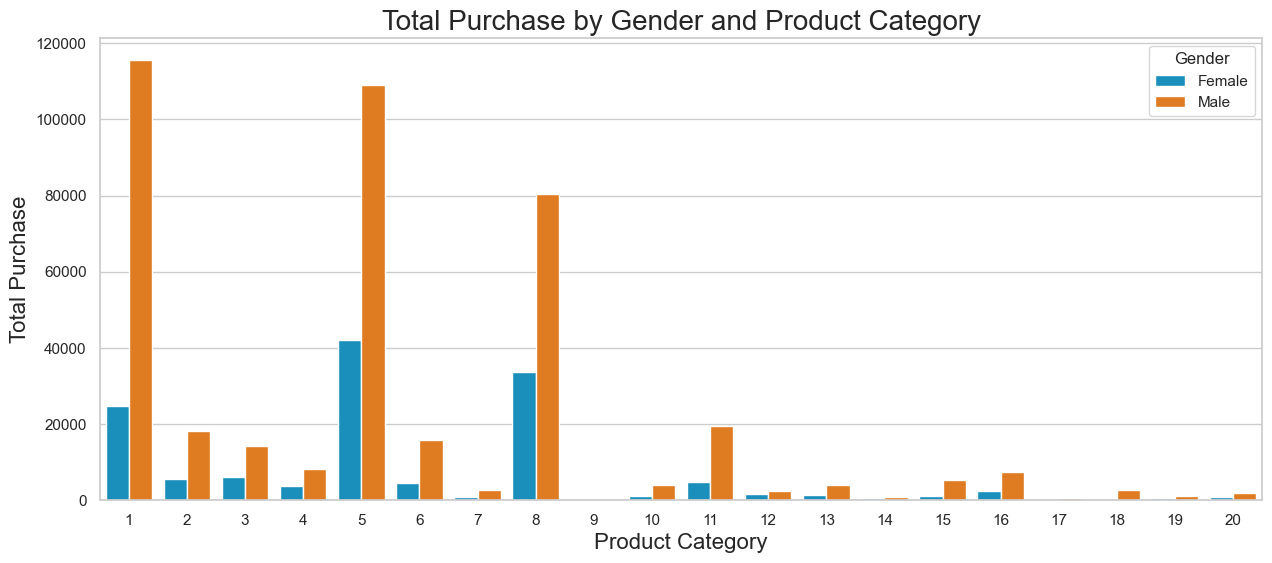

In [26]:

data = df.groupby(['Product_Category','Gender'])['Purchase'].count().reset_index()

plt.figure(figsize=(15, 6))

sns.barplot(x='Product_Category', y='Purchase', hue='Gender', data=data, palette=bi_palette)

plt.title('Total Purchase by Gender and Product Category', fontsize=20)
plt.xlabel('Product Category', fontsize=16)
plt.ylabel('Total Purchase', fontsize=16)

plt.show()

### Purchase statistical 

In [27]:
overall_mean = df['Purchase'].mean()
overall_median = df['Purchase'].median()

print("Overall Mean: ", overall_mean)
print("Overall Median: ", overall_median)
print("Difference between Mean and Median: ", overall_mean - overall_median)
print("Skewness: ", df['Purchase'].skew())
print("\n","="*50,"\n")

men_purchase = df[df['Gender']=='Male']
men_mean = men_purchase['Purchase'].mean()
men_median = men_purchase['Purchase'].median()

print("Men Mean: ",men_mean)
print("Men Median: ",men_median)
print("Difference between Mean and Median: ", men_mean-men_median)
print("Skewness: ", men_purchase['Purchase'].skew())
print("\n","="*50,"\n")

women_purchase = df[df['Gender']=='Female']
women_mean = women_purchase['Purchase'].mean()
women_median = women_purchase['Purchase'].median()

print("Women Mean: ",women_mean)
print("Women Median: ",women_median)
print("Difference between Mean and Median: ", women_mean-women_median)
print("Skewness: ", women_purchase['Purchase'].skew())
print("\n","="*50,"\n")


Overall Mean:  9263.968712959126
Overall Median:  8047.0
Difference between Mean and Median:  1216.9687129591257
Skewness:  0.6001400037087128


Men Mean:  9437.526040472265
Men Median:  8098.0
Difference between Mean and Median:  1339.5260404722649
Skewness:  0.5502006652686935


Women Mean:  8734.565765155476
Women Median:  7914.0
Difference between Mean and Median:  820.5657651554757
Skewness:  0.752335341737734




### 🕵🏽‍♂️ Analysis of Purchase Amounts by Gender

#### Overall Summary:
* Overall Mean Purchase Amount: $9,263.97
* Overall Median Purchase Amount: $8,047.0
* Difference between Mean and Median: $1,216.97
* Overall Skewness: 0.600

#### Men vs. Women:
1. Men:

* Mean Purchase Amount: $9,437.53
* Median Purchase Amount: $8,098.0
* Difference between Mean and Median: $1,339.53
* Skewness: 0.550

2. Women:

* Mean Purchase Amount: $8,734.57
* Median Purchase Amount: $7,914.0
* Difference between Mean and Median: $820.57
* Skewness: 0.752

#### 🔭 Insight
##### Gender Comparison:
* **Men:** Both the mean and median purchase amounts for men are higher than those for women, indicating that, on average, men spend more during Black Friday sales.
* **Women:** Women exhibit a slightly higher skewness than men, indicating a slightly more pronounced right-skew in the distribution of purchase amounts among women.

#### Confidence Interval

In [28]:
def conf_interval(data, conf=0.95):
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = stats.sem(data)
    interval = stderr * stats.t.ppf((1 + conf) / 2., n - 1)
    return mean - interval, mean, mean + interval

intervals = [0.90, 0.95, 0.99]

for i in intervals:
    print("Confidence Interval for the purchase at {} level is: {}".format(i, conf_interval(df['Purchase'], i)))
    print("Confidence Interval for male purchase at {} level is: {}".format(i, conf_interval(men_purchase['Purchase'], i)))
    print("Confidence Interval for female purchase at {} level is: {}".format(i, conf_interval(women_purchase['Purchase'], i)))
    print("\n","="*50,"\n")

Confidence Interval for the purchase at 0.9 level is: (9252.828624742293, 9263.968712959126, 9275.108801175958)
Confidence Interval for male purchase at 0.9 level is: (9424.512468203842, 9437.526040472265, 9450.539612740688)
Confidence Interval for female purchase at 0.9 level is: (8713.287689504074, 8734.565765155476, 8755.843840806878)


Confidence Interval for the purchase at 0.95 level is: (9250.694472258305, 9263.968712959126, 9277.242953659947)
Confidence Interval for male purchase at 0.95 level is: (9422.019402055814, 9437.526040472265, 9453.032678888716)
Confidence Interval for female purchase at 0.95 level is: (8709.21132117373, 8734.565765155476, 8759.92020913722)


Confidence Interval for the purchase at 0.99 level is: (9246.523381381907, 9263.968712959126, 9281.414044536345)
Confidence Interval for male purchase at 0.99 level is: (9417.14682877079, 9437.526040472265, 9457.90525217374)
Confidence Interval for female purchase at 0.99 level is: (8701.24420611832, 8734.56576515

In [29]:
data = df['Purchase']
conf = [0.90, 0.95, 0.99]
sample_data = {i: conf_interval(data, i) for i in conf}

df_conf = pd.DataFrame(sample_data, index=['lower', 'mean', 'upper']).T
df_conf

,lower,mean,upper
0.90,9252.828625,9263.968713,9275.108801
0.95,9250.694472,9263.968713,9277.242954
0.99,9246.523381,9263.968713,9281.414045


### Do women spend more on Black Friday than men?

In [30]:
# Null Hypothesis: There is no difference in the mean purchase
# Alternative Hypothesis: There is a difference in the mean purchase

# Calculate
t_stat, p_value = stats.ttest_ind(men_purchase['Purchase'], women_purchase['Purchase'])
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# Interpret
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis, there is a difference in the mean purchase")
else:
    print("We fail to reject the null hypothesis, there is no difference in the mean purchase")

t-statistic:  44.837957934353966
p-value:  0.0
We reject the null hypothesis, there is a difference in the mean purchase


In [31]:
def bootstrapping(sample1, sample2, sample_size, itr_size=1000, ci=95):
    
    ci = ci / 100 # Convert confidence level to decimal
    
    # Create bootstrapped samples
    sample1_means = [np.mean(sample1.sample(sample_size)) for _ in range(itr_size)]
    sample2_means = [np.mean(sample2.sample(sample_size)) for _ in range(itr_size)]
    
    # Calculate mean and standard deviation of bootstrapped samples
    mean1, mean2 = np.mean(sample1_means), np.mean(sample2_means)
    sigma1, sigma2 = np.std(sample1_means), np.std(sample2_means)
    
    # Calculate standard error of the means
    sem1, sem2 = stats.sem(sample1_means), stats.sem(sample2_means)
    
    # Calculate lower and upper confidence intervals
    lower_limit_l = mean1 + stats.norm.ppf((1 - ci) / 2) * (sigma1 / np.sqrt(sample_size))
    upper_limit_l = mean1 + stats.norm.ppf(ci + (1 - ci) / 2) * (sigma1 / np.sqrt(sample_size))
    lower_limit_2 = mean2 + stats.norm.ppf((1 - ci) / 2) * (sigma2 / np.sqrt(sample_size))
    upper_limit_2 = mean2 + stats.norm.ppf(ci + (1 - ci) / 2) * (sigma2 / np.sqrt(sample_size))
    
    # Plot KDE plots for bootstrapped samples ["#007DC6", "#00D1F2", "#FF7900"]
    plt.figure(figsize=(15, 6))
    sns.kdeplot(data=sample1_means, fill=True, label=f"Men (Mean: {np.round(mean1, 2)})", color='#00D1F2')
    plt.axvline(mean1, color='#FF00FF', label='Men Mean', linestyle='solid', linewidth=1)
    sns.kdeplot(data=sample2_means, fill=True, label=f"Women (Mean: {np.round(mean2, 2)})", color='#FF7900')
    plt.axvline(mean2, color='#1434A4', linestyle='solid', linewidth=1, label='Women Mean')
    
    # Add legend and labels to the plot
    plt.legend(loc='upper right')
    plt.title(f"Sample Size: {sample_size}, Men Avg: {np.round(mean1, 2)} (CI: {ci*100}%) vs Women Avg: {np.round(mean2, 2)} (CI: {ci*100}%)")
    plt.xlabel('Purchase')
    plt.ylabel('Density')
    plt.show()
    
    # Return mean values and confidence interval limits
    return [round(mean1, 2), round(mean2, 2), round(lower_limit_l, 2), round(upper_limit_l, 2), round(lower_limit_2, 2), round(upper_limit_2, 2)]

Sample Size: 300


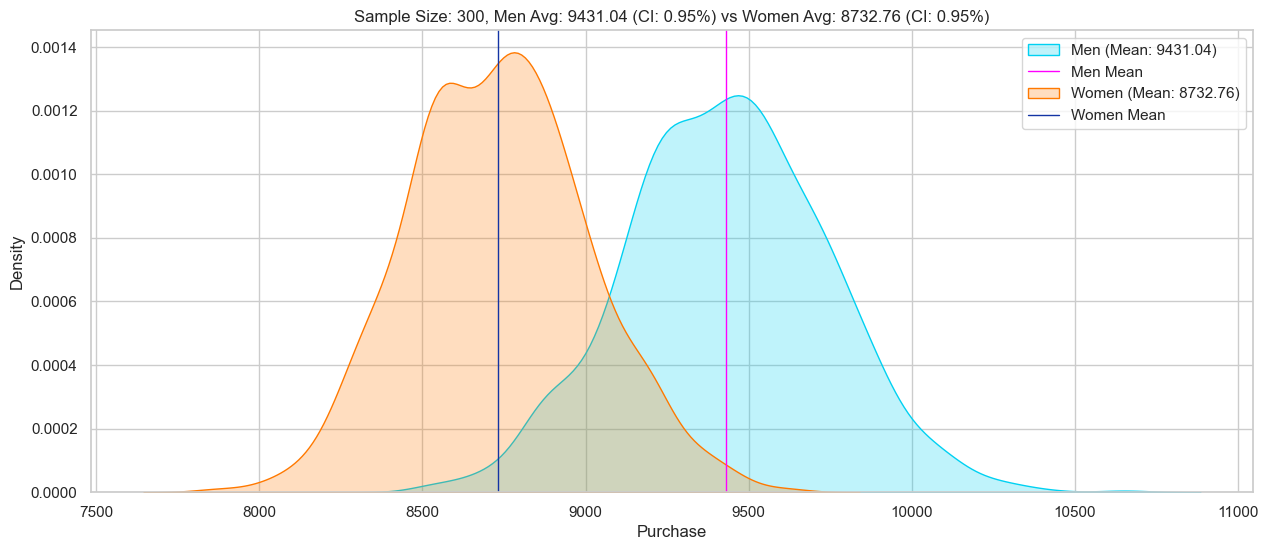

Sample Size: 600


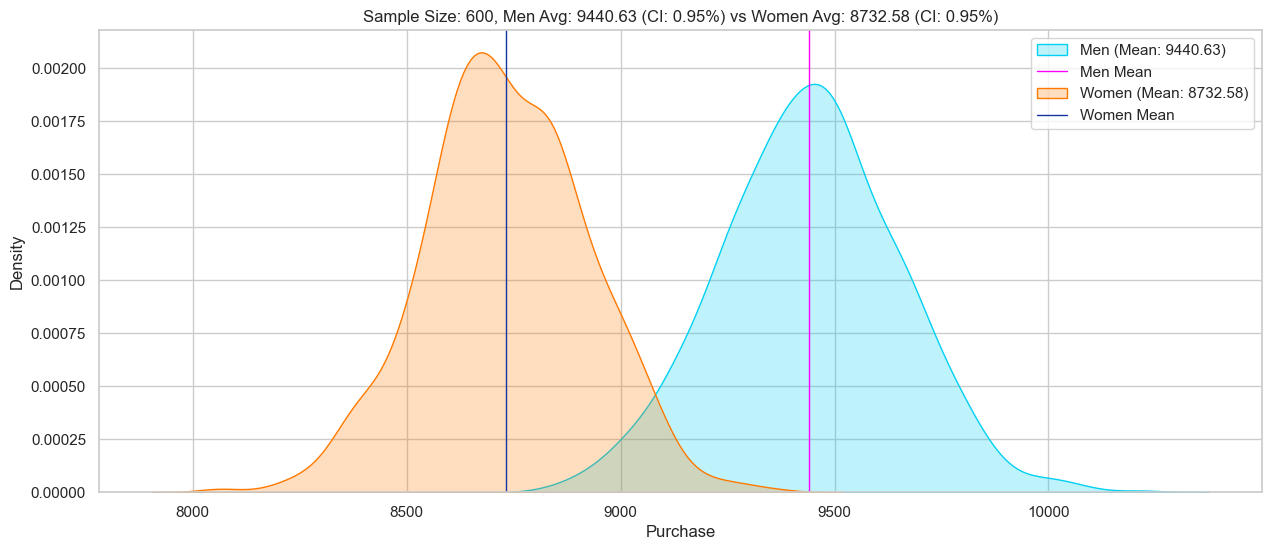

Sample Size: 1200


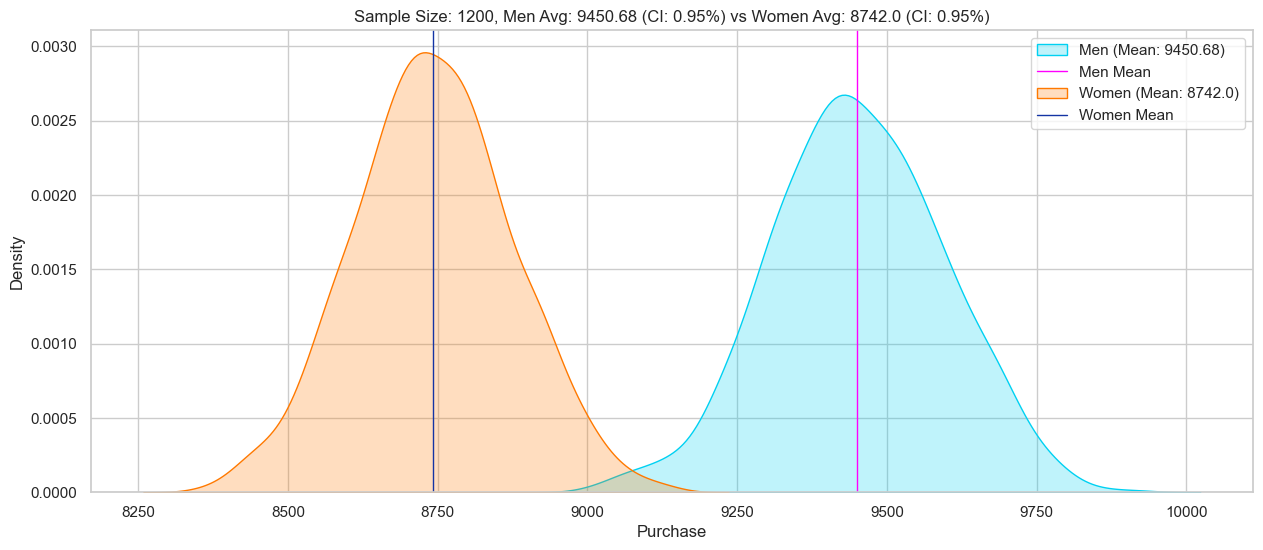

Sample Size: 2500


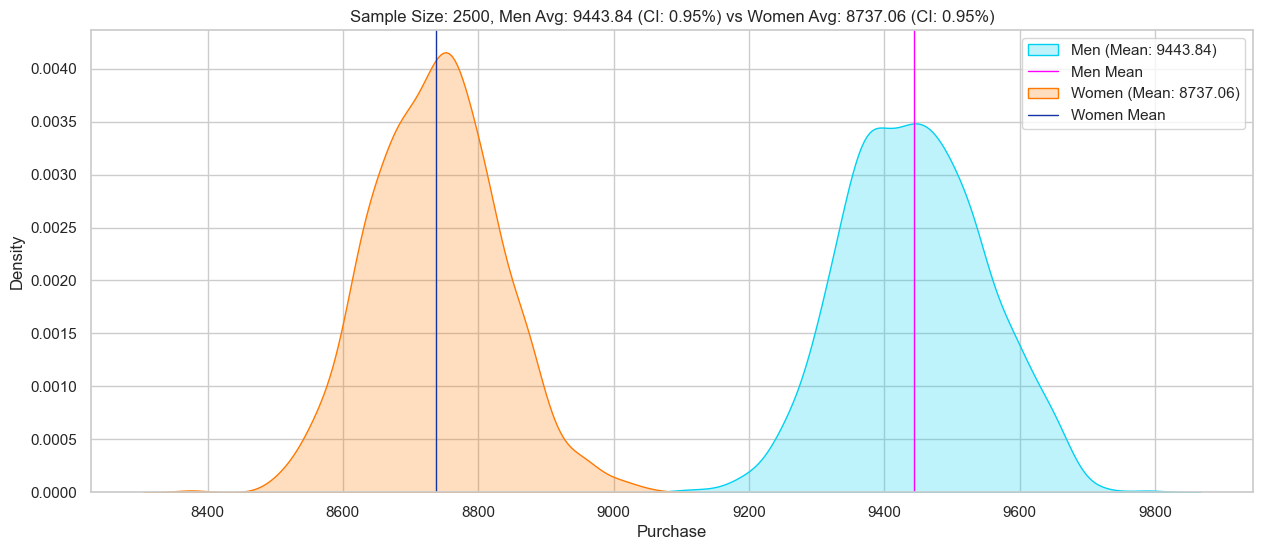

Sample Size: 5000


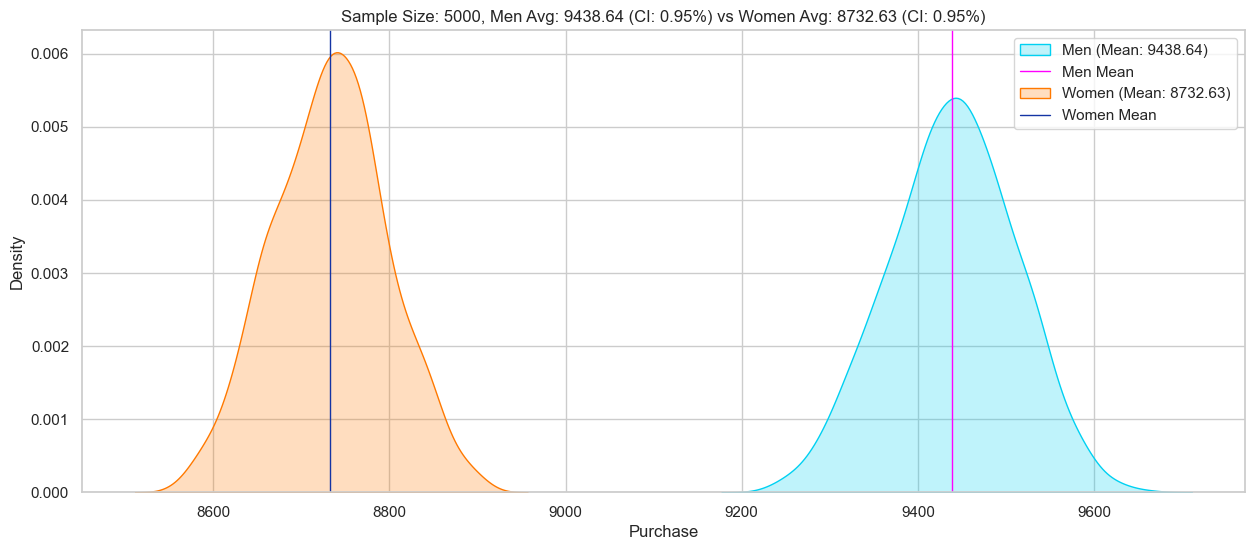

Sample Size: 10000


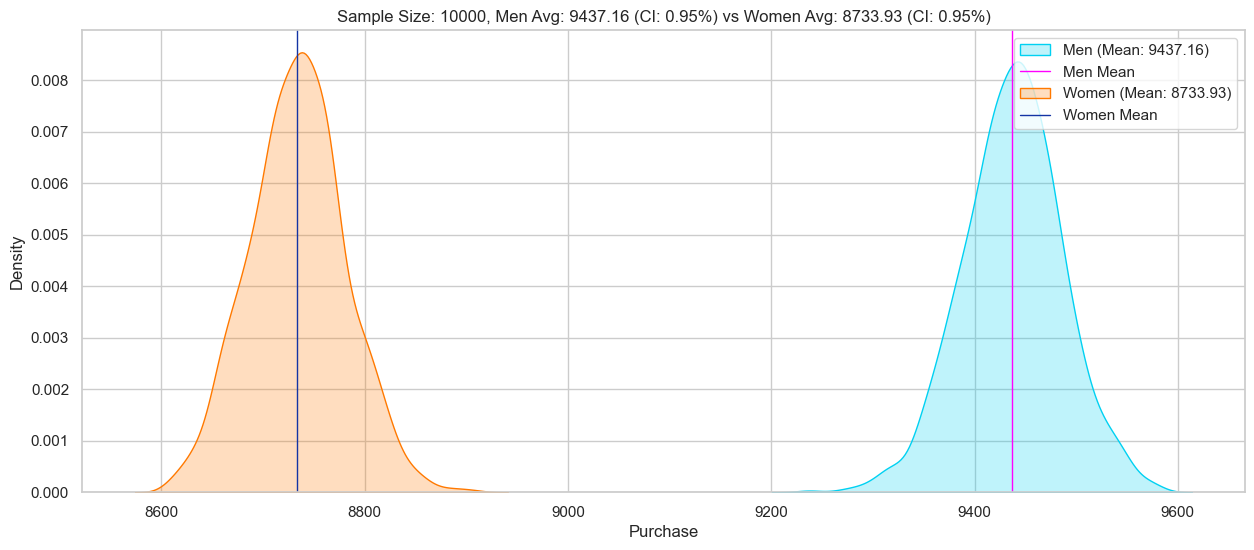

In [32]:
sample_size = [300, 600, 1200, 2500, 5000, 10000]
itr_size = 1000
ci = 0.95

cf = []
for size in sample_size:
    print(f"Sample Size: {size}")
    row = [size]
    bootstr = bootstrapping(men_purchase['Purchase'], women_purchase['Purchase'], size, itr_size, ci)
    row.extend(bootstr)
    cf.append(row)


In [33]:
df_boot = pd.DataFrame(cf, columns=['sample_size','men_mean', 'women_mean', 'men_lower', 'women_lower', 'men_upper', 'women_upper'])
df_boot

,sample_size,men_mean,women_mean,men_lower,women_lower,men_upper,women_upper
0,300,9431.04,8732.76,9430.83,9431.26,8732.58,8732.95
1,600,9440.63,8732.58,9440.53,9440.73,8732.49,8732.68
2,1200,9450.68,8742.00,9450.63,9450.73,8741.96,8742.05
3,2500,9443.84,8737.06,9443.81,9443.86,8737.04,8737.08
4,5000,9438.64,8732.63,9438.63,9438.65,8732.62,8732.64
5,10000,9437.16,8733.93,9437.16,9437.17,8733.93,8733.94


#### 🔭 Insight

* As the sample size increases, both the mean purchase amount for men and women stabilize around certain values.
* The width of the confidence intervals narrows down as the sample size increases.
* At 95% of confidence interval, For the smaller sample size the men and women ranges are overlapping as when the sample size increase more than 2500 we see they don't overlap
* It is evident that **there are significant differences in spending habits between male and female customers**.

### 🌟 Recommendations

Based on the analysis, the following recommendations can be made to the store:
1. Focus on the age group of 26-35 as they are the highest spenders.
2. Focus on the city category B as it has the highest number of customers.
3. Focus on the product category 1 as it has the highest number of customers.
4. Focus on the occupation 4 as it has the highest number of customers.
5. Focus on the married customers as they are the highest spenders.
6. Focus on the customers who have stayed in the city for 1 year as they are the highest spenders.

### ⏭️ Actionable Insights

1. The highest number of customers are from City_Category B, followed by City_Category C and City_Category A.
2. At all confidence levels, the confidence intervals for male purchase amounts are consistently higher than those for females, suggesting that, on average, males tend to spend more during Black Friday sales.
3. The number of Single customers is more than the number of Married customers. (Focus of marketing targeting married customers to increase sales.)
4. The number of customers who have stayed for 1 year in the current city is more than the number of customers who have stayed for 2 years in the current city.
5. Targeting the customers aged over 26 years will increase the sales.